<a href="https://colab.research.google.com/github/XingxinHE/Python-for-Data-Analysis-Notes/blob/master/7_1_Handling_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

A significant amount of time is spent on data preparation: **loading, cleaning, transforming, and rearranging**. Such tasks are often reported to take up 80% or more of an analyst’s time.

For numeric data, pandas uses the floating-point value NaN(Not a Number) to represent missing data.

In pandas, we've adopted a convention used in the R programming language by refering to missing data as NA, which stands for not available.

NA data has 2 means:
  (1)does not exist 
  (2)exists but was not observed

The built-in Python None value is also treated as NA in object arrays

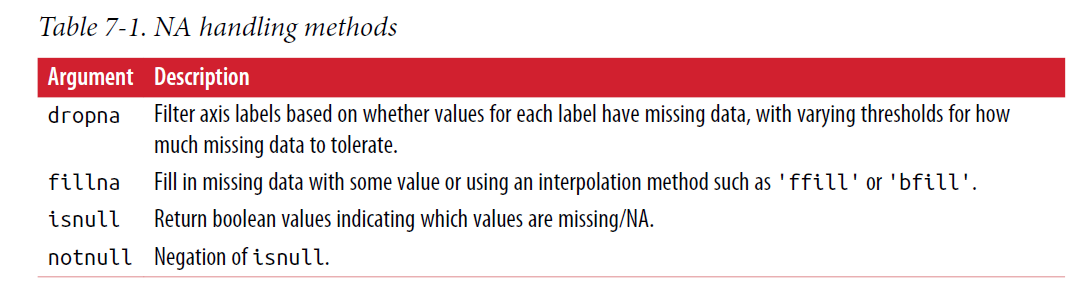

## Filtering Out Missing Data

In [2]:
from numpy import nan as NA

In [3]:
data = pd.Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [4]:
data.dropna() #经常用到舍弃NA

0    1.0
2    3.5
4    7.0
dtype: float64

In [6]:
#利用mask可以达到以上效果, notnull()生成bool的mask
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

dropna()  by default drops **any row** containing a missing value!!!

In [7]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
           [NA, NA, NA], [NA, 6.5, 3.]])
clean_data = data.dropna()

In [8]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [9]:
clean_data

,0,1,2
0,1.0,6.5,3.0


In [10]:
data.dropna(how='all') #默认how='any'，也就是说只要有NaN，那么那一row全都drop
#但how='all'的时候，必须所有row都是NaN才会把这一row给drop掉

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [11]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [12]:
data.dropna(axis=1, how='all')  #上面是drop row，将axis改为1，则对column为参考依据
#可以看到，2 row还全是na，但是column 4全是Na的被drop掉了

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


假设你只想drop一定数目的话，可以用threshold选项

In [13]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,-1.890328,NaN,NaN
1,-1.191661,NaN,NaN
2,-1.756895,NaN,1.684422
3,-0.747249,NaN,-0.900893
4,-1.320511,-1.100482,0.195789
5,0.726907,-1.181704,0.900377
6,-0.497307,-0.208166,2.150971


In [19]:
df.dropna()

,0,1,2
4,-1.320511,-1.100482,0.195789
5,0.726907,-1.181704,0.900377
6,-0.497307,-0.208166,2.150971


In [14]:
df.dropna(thresh=2)

,0,1,2
2,-1.756895,NaN,1.684422
3,-0.747249,NaN,-0.900893
4,-1.320511,-1.100482,0.195789
5,0.726907,-1.181704,0.900377
6,-0.497307,-0.208166,2.150971


## Filling In Missing Data
fillna()

In [20]:
df.fillna(0)

,0,1,2
0,-1.890328,0.000000,0.000000
1,-1.191661,0.000000,0.000000
2,-1.756895,0.000000,1.684422
3,-0.747249,0.000000,-0.900893
4,-1.320511,-1.100482,0.195789
5,0.726907,-1.181704,0.900377
6,-0.497307,-0.208166,2.150971


In [21]:
#还可以使用dict来specify具体的na值，哪个column哪个值
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-1.890328,0.500000,0.000000
1,-1.191661,0.500000,0.000000
2,-1.756895,0.500000,1.684422
3,-0.747249,0.500000,-0.900893
4,-1.320511,-1.100482,0.195789
5,0.726907,-1.181704,0.900377
6,-0.497307,-0.208166,2.150971


之前我们看到的ffill不仅可以在reindex用，也可在这里用

In [22]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,-0.417105,-0.584433,-0.281854
1,-0.683282,-0.673099,0.305071
2,0.412918,NaN,1.319976
3,-0.800430,NaN,0.069263
4,-1.024195,NaN,NaN
5,-0.847578,NaN,NaN


In [23]:
df.fillna(method='ffill') #可以看到后面的NaN全都变成了上一个值的duplicates

,0,1,2
0,-0.417105,-0.584433,-0.281854
1,-0.683282,-0.673099,0.305071
2,0.412918,-0.673099,1.319976
3,-0.800430,-0.673099,0.069263
4,-1.024195,-0.673099,0.069263
5,-0.847578,-0.673099,0.069263


In [24]:
df.fillna(method='ffill', limit=2) #限制duplicate多少个

,0,1,2
0,-0.417105,-0.584433,-0.281854
1,-0.683282,-0.673099,0.305071
2,0.412918,-0.673099,1.319976
3,-0.800430,-0.673099,0.069263
4,-1.024195,NaN,0.069263
5,-0.847578,NaN,0.069263


通常来说，还可以用mean来填充na

In [25]:
data = pd.Series([1., NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [26]:
data.fillna(data.mean())  #把mean填在NaN里面

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

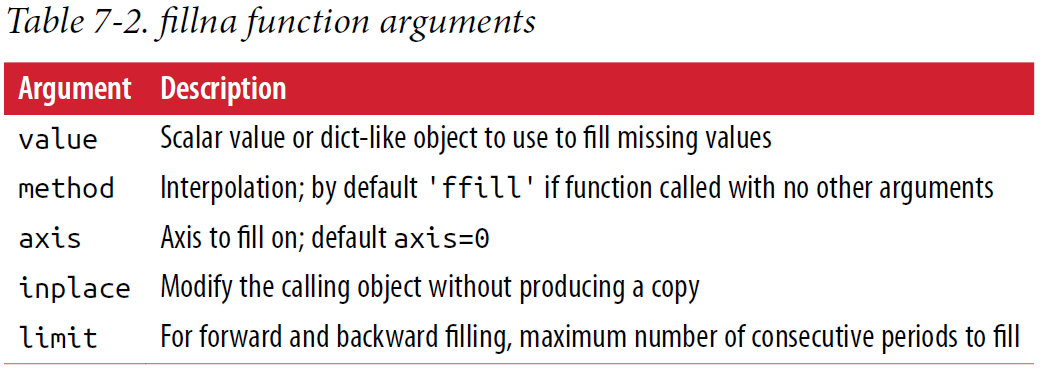